**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [5]:
TXT_ASSAY = "CRISPRi_Growth_K562_Gersbach_Alex"

## Import data

In [8]:
txt_fdiry = file.path(FD_DAT, "processed")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_Alex 
fcc_astarr_csaw 
fcc_enhancer_Junke_zscore 
fcc_trackhub_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram_230621 
MPRA_Tiling_K562_Tewhey_Hannah 
Readmd.md 
STARR_ATAC_K562_Reddy_KS274_240311 
STARR_ATAC_K562_Reddy_KS91_210401 
STARR_WHG_K562_Reddy_A001_Alex 
STARR_WHG_K562_Reddy_A001_Kari 
TF_modules_Shannon 


In [9]:
txt_foldr = "STARR_ATAC_K562_Reddy_KS91_210401"
txt_fdiry = file.path(FD_DAT, "processed", txt_foldr, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep1.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep2.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep3.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep4.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep5.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Input_rep6.masked.dedup.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.fragments.counts.corrected.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.fragments.counts.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.fragments.counts.corrected.txt.gz.tsv 
bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep3.

In [27]:
###
txt_foldr = "STARR_ATAC_K562_Reddy_KS91_210401"
txt_fdiry = file.path(FD_DAT, "processed", txt_foldr, "summary")
txt_fname = "bedtools.summary.*ASTARRseq_Output*.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)

In [28]:
vec_txt_fname

[1] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.fragments.counts.txt.gz.tsv"          
[2] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.fragments.counts.corrected.txt.gz.tsv"
[3] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.fragments.counts.txt.gz.tsv"          
[4] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.fragments.counts.corrected.txt.gz.tsv"
[5] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.fragments.counts.txt.gz.tsv"          
[6] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.fragments.counts.corrected.txt.gz.tsv"
[7] "bedtools.summary.KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.fragments.counts.txt.gz.tsv"

In [29]:
vec_txt_label = c(
    "Output_rep1", 
    "Output_rep2_corrected", 
    "Output_rep2", 
    "Output_rep3_corrected", 
    "Output_rep3", 
    "Output_rep4_corrected", 
    "Output_rep4"
)

In [30]:
lst = lapply(vec_txt_fpath, function(txt_fpath){
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_label

dat = bind_rows(lst, .id = "Label")

### assign and show
dat_bed_summary = dat
print(dim(dat))
fun_display_table(head(dat))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”


[1] 3192   11


Label,chrom,chrom_length,num_ivls,total_ivl_bp,chrom_frac_genome,frac_all_ivls,frac_all_bp,min,max,mean
Output_rep1,chr1,248956422,4337990,1078407079,0.0775738,0.1104984,0.1109582,20,2000,248.5960
Output_rep1,chr2,242193529,2921214,721129620,0.0754665,0.0744099,0.0741976,22,1998,246.8596
Output_rep1,chr3,198295559,2380031,586783890,0.0617881,0.0606248,0.0603747,23,1997,246.5446
Output_rep1,chr4,190214555,1886369,460134885,0.0592701,0.0480501,0.0473436,19,2000,243.9262
Output_rep1,chr5,181538259,2212667,542313418,0.0565666,0.0563616,0.0557991,22,2000,245.0949
Output_rep1,chr6,170805979,2738392,677724164,0.0532224,0.0697530,0.0697316,27,1995,247.4898


In [31]:
vec = c(1:22, "X", "Y", "M")
vec = paste0("chr", vec)
vec = c(vec, "all")

vec_txt_chrom = vec
print(vec)

 [1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"  "chrY"  "chrM"  "all"  


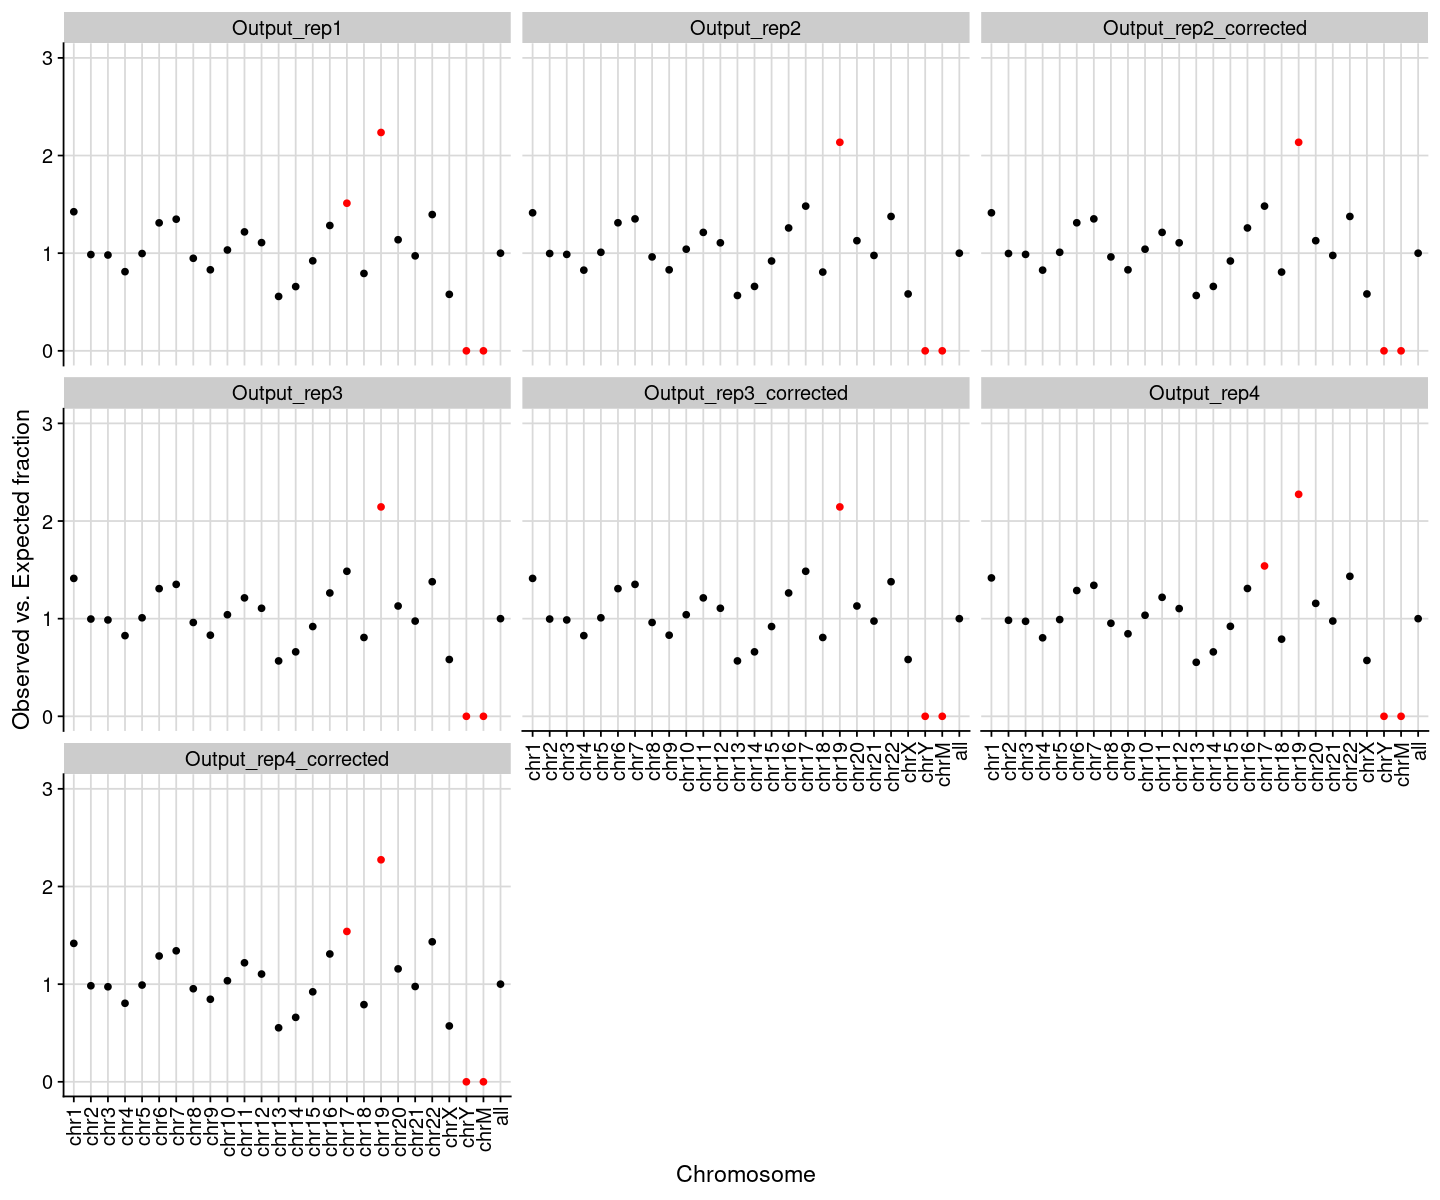

In [34]:
dat = dat_bed_summary
dat = dat %>%
     dplyr::filter(chrom %in% vec_txt_chrom) %>% 
     dplyr::mutate(obs_v_exp = frac_all_ivls/chrom_frac_genome) %>%
     dplyr::mutate(color = ifelse(obs_v_exp>1.5 | obs_v_exp<0.5, 'red', 'black')) %>%
     dplyr::mutate(chrom = factor(chrom, levels = vec_txt_chrom))

gpt = ggplot(dat, aes(x=chrom, y=obs_v_exp, color = color)) +
    geom_point() +
    scale_color_identity() +
    ylim(0,3) +
    ylab("Observed vs. Expected fraction") +
    xlab("Chromosome") +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Label)
gpt = gpt + theme(axis.text.x = element_text(hjust = 1, vjust=0.5, size = 12, angle = 90))

options(repr.plot.height=10, repr.plot.width=12)
print(gpt)

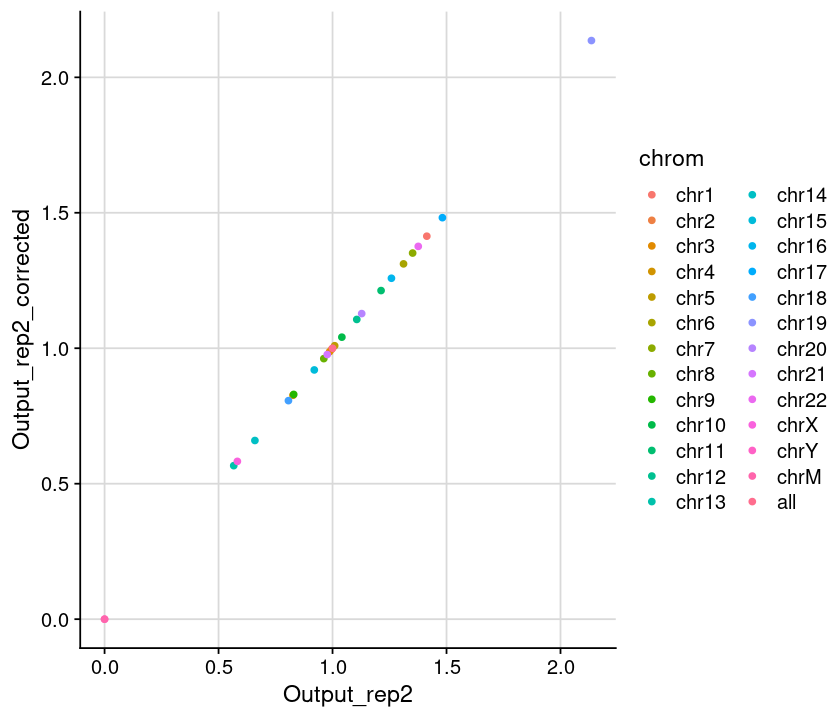

In [42]:
dat = dat_bed_summary
dat = dat %>%
     dplyr::filter(chrom %in% vec_txt_chrom) %>% 
     dplyr::mutate(obs_v_exp = frac_all_ivls/chrom_frac_genome) %>%
     dplyr::mutate(color = ifelse(obs_v_exp>1.5 | obs_v_exp<0.5, 'red', 'black')) %>%
     dplyr::mutate(chrom = factor(chrom, levels = vec_txt_chrom))

dat = dat %>% 
    dplyr::filter(Label %in% c("Output_rep2_corrected", "Output_rep2")) %>%
    dplyr::select(Label, chrom, obs_v_exp) %>%
    tidyr::spread(Label, obs_v_exp)

gpt = ggplot(dat, aes(x=Output_rep2, y=Output_rep2_corrected, color = chrom)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [37]:
head(dat)

Label,chrom,chrom_length,num_ivls,total_ivl_bp,chrom_frac_genome,frac_all_ivls,frac_all_bp,min,max,mean,obs_v_exp,color
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Output_rep2_corrected,chr1,248956422,7679234,1867850127,0.07757377,0.10965748,0.11010784,19,2000,243.2339,1.4135896,black
Output_rep2_corrected,chr2,242193529,5267755,1271475368,0.07546648,0.07522218,0.07495217,22,1996,241.3695,0.9967628,black
Output_rep2_corrected,chr3,198295559,4272872,1030185208,0.06178806,0.06101551,0.06072836,26,1998,241.0990,0.9874968,black
Output_rep2_corrected,chr4,190214555,3429856,819874803,0.05927005,0.04897746,0.04833078,24,1999,239.0406,0.8263441,black
Output_rep2_corrected,chr5,181538259,3998210,959941615,0.05656655,0.05709340,0.05658757,21,2000,240.0928,1.0093138,black
Output_rep2_corrected,chr6,170805979,4887850,1182753192,0.05322242,0.06979723,0.06972208,24,1996,241.9782,1.3114254,black


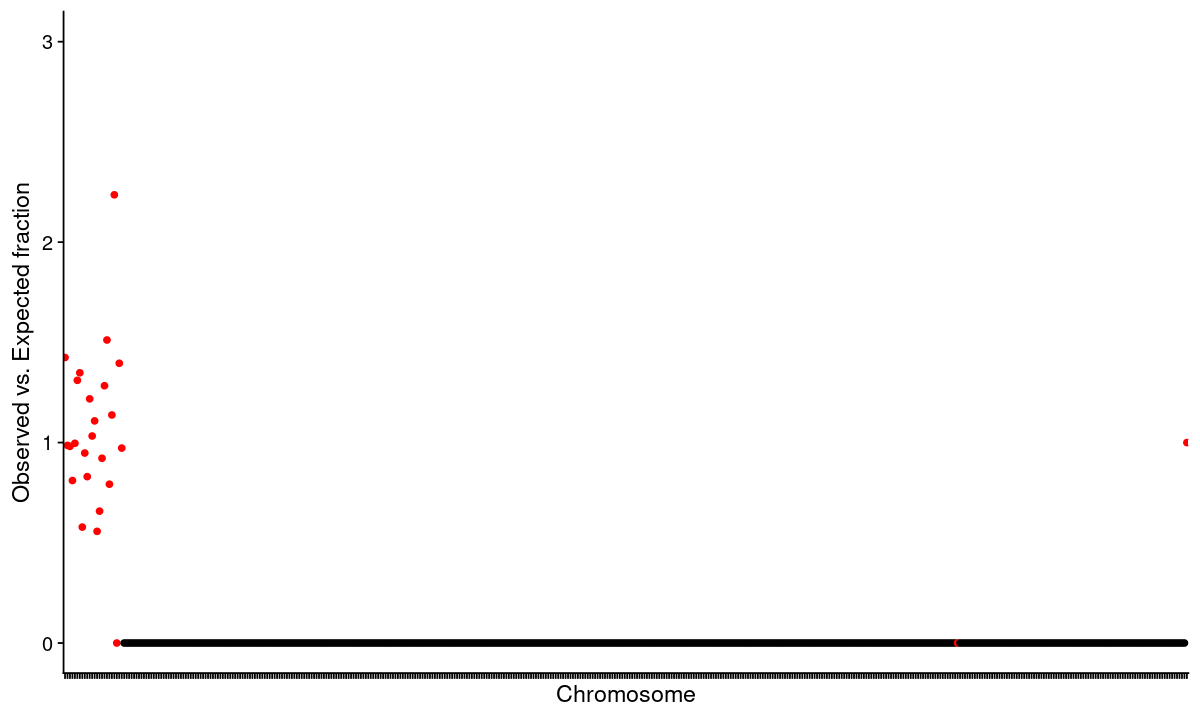

In [48]:
dat = dat_bed_summary
dat = dat %>% 
    dplyr::filter(Label == "Output_rep1") %>%
    dplyr::mutate(obs_v_exp = frac_all_ivls/chrom_frac_genome) %>%
    dplyr::mutate(color = ifelse(chrom %in% vec_txt_chrom, 'red', 'black')) %>%
    dplyr::mutate(chrom = factor(chrom, levels = chrom))

gpt = ggplot(dat, aes(x=chrom, y=obs_v_exp, color = color)) +
    geom_point() +
    scale_color_identity() +
    ylim(0,3) +
    ylab("Observed vs. Expected fraction") +
    xlab("Chromosome") +
    #theme_bw() +
    theme_cowplot() +
    #background_grid() +
    theme(axis.text.x = element_blank())

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [50]:
dat = dat_bed_summary
dat = dat %>%
     dplyr::filter(!(chrom %in% vec_txt_chrom)) %>% 
     dplyr::mutate(obs_v_exp = frac_all_ivls/chrom_frac_genome) %>%
     dplyr::mutate(color = ifelse(obs_v_exp>1.5 | obs_v_exp<0.5, 'red', 'black'))
table(dat$Label, dat$obs_v_exp)

                       
                          0
  Output_rep1           430
  Output_rep2           430
  Output_rep2_corrected 430
  Output_rep3           430
  Output_rep3_corrected 430
  Output_rep4           430
  Output_rep4_corrected 430

In [ ]:
dat = dat_bed_summary
dat = dat %>% 
    dplyr::filter(Label == "Output_rep1") %>%
    dplyr::mutate(obs_v_exp = frac_all_ivls/chrom_frac_genome) %>%
    dplyr::mutate(color = ifelse(chrom %in% vec_txt_chrom, 'red', 'black')) %>%
    dplyr::mutate(chrom = factor(chrom, levels = chrom))